# Predicting Knowledge Level of Students in Electrical DC Machines

# Introduction

This project aims to analyze students' knowledge of Electrical DC Machines, which are crucial components of many electrical systems. The dataset used is from a Ph.D. thesis available on the UCI Machine Learning Repository, titled "User knowledge Modelling Data Set."

We want to answer the following question:

**Can we predict the knowledge level of students in Electrical DC Machines given the factors listed below?**

The columns in the dataset (taken mostly from the dataset description) are:
<ol>
    <li> STG: The degree of study time for goal object materials </li>
    <li> SCG: The degree of repetition number of user for goal materials</li>
    <li> STR: The degree of study time of user for related objects with goal object</li>
    <li> LPR: The exam performance of user for related objects with goal object </li>
    <li> PEG: The exam performance of user for goal objects</li>
    <li> UNS: The knowledge level of user (with 4 values: Very Low, Low, Middle, and High)</li>
</ol>

Note: all numerical data is standardized and "goal object" refers to the subject of Electrical DC Machines while "related objects with goal object" refer to the other subjects or topics that are related but not exactly the "goal object"

# Preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(readxl)
set.seed(1234)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

<h2> Loading the dataset into R </h2>

In [2]:
temp_file <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls", temp_file)
study_data <- read_excel(temp_file, sheet = 2)
head(study_data)

New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)


<h2> Cleaning and Wrangling </h2>

In [3]:
#Data is already in tidy format
study_data_required <- study_data |> select(STG,SCG,STR,LPR,PEG,UNS) |> drop_na() # selecting all of the columsn and removing the columns with no values
head(study_data_required) # Preview of the ENTIRE dataset

#Summarizing
nrow(study_data_required) # Number of rows
data_split <- initial_split(study_data_required,prop = 0.75, strata = UNS) # Splitting our data 75% for training, 25% for testing
data_training <- training(data_split)
data_test <- testing(data_split)

head(data_training) # Preview of Training data
head(data_test) # Preview of Testing data

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


[1] 258

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.000,0.50,0.20,0.85,High
0.18,0.180,0.55,0.30,0.81,High
0.12,0.120,0.75,0.35,0.80,High
0.05,0.070,0.70,0.01,0.05,very_low
0.09,0.300,0.68,0.18,0.85,High
0.08,0.325,0.62,0.94,0.56,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.20,0.14,0.35,0.72,0.25,Low
0.10,0.10,0.70,0.15,0.90,High
0.20,0.20,0.70,0.30,0.60,Middle
0.18,0.31,0.32,0.42,0.28,Low


<h2> Summary of the Dataset (not using Training dataset)</h2>

In [4]:
num_obs <- nrow(study_data_required)

data_summary <- study_data_required |>
  group_by(UNS) |>
  summarize(
    count = n(),
    percentage = (n()/num_obs) * 100
  )

data_summary # Gives preview of ALL the data we have

UNS,count,percentage
<chr>,<int>,<dbl>
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527
very_low,24,9.302326


<h2>Summary of the data using Training Data </h2>

In [5]:
num_observation <- nrow(data_training)

data_summary_train <- data_training |>
  group_by(UNS) |>
  summarize(
    count = n(),
       percentage = (n()/num_observation) * 100,
       STG_mean = mean(STG, na.rm = TRUE),
       SCG_mean = mean(SCG, na.rm = TRUE),
       STR_mean = mean(SCG, na.rm = TRUE),
       LPR_mean = mean(LPR, na.rm = TRUE),
       PEG_mean = mean(PEG, na.rm = TRUE))

data_summary_train

UNS,count,percentage,STG_mean,SCG_mean,STR_mean,LPR_mean,PEG_mean
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,48,25.000000,0.4100000,0.4216875,0.4216875,0.4914583,0.7725000
Low,62,32.291667,0.3170806,0.3367097,0.3367097,0.4932258,0.2360161
Middle,68,35.416667,0.3883529,0.3709265,0.3709265,0.3310294,0.5470588
very_low,14,7.291667,0.3337857,0.2164286,0.2164286,0.3350000,0.1064286


In [6]:
# Wrangling the data, removing count and percentage and turning the columns into rows
data_mean <- data_summary_train |>
    select(-count, -percentage) |>
    pivot_longer(cols = c(STG_mean, SCG_mean, STR_mean, LPR_mean, PEG_mean),
                 names_to = "score", # temporary name for both exam score and study habit score
                 values_to = "mean") |>
    mutate(UNS = factor(UNS, levels = c("High", "Middle", "Low", "very_low"))) |>
    arrange(UNS)

In [7]:
# Code for study habits vs. Knowledge level plot
study_habit_means <- data_mean |>
    filter(score != 'LPR_mean' & score != 'PEG_mean') |>
    rename(study_habit = score)
study_habit_means

study_habits_means_vs_knowledge_plot <- ggplot(study_habit_means, aes(x = UNS, y = mean, fill = study_habit)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_grid(cols = vars(study_habit)) +  
    labs(x = "Knowledge Level of User", y = "Study Habits", fill = "Study Habit") +
    ggtitle("Study Habits vs Knowledge Level of User")

UNS,study_habit,mean
<fct>,<chr>,<dbl>
High,STG_mean,0.4100000
High,SCG_mean,0.4216875
High,STR_mean,0.4216875
Middle,STG_mean,0.3883529
Middle,SCG_mean,0.3709265
Middle,STR_mean,0.3709265
Low,STG_mean,0.3170806
Low,SCG_mean,0.3367097
Low,STR_mean,0.3367097


In [10]:
# Code for exam performance vs. Knowledge level plot
exam_performance_means <- data_mean |>
    filter(score == 'LPR_mean' | score == 'PEG_mean') |>
    rename(exam_performance = score)
exam_performance_means

exam_performance_means_vs_knowledge_plot <- ggplot(exam_performance_means, aes(x = UNS, y = mean, fill = exam_performance)) +
    geom_bar(stat = "identity", position = "dodge") +
    facet_grid(cols = vars(exam_performance)) +  
    labs(x = "Knowledge Level of User", y = "Exam Performance", fill = "Exam Performance") +
    ggtitle("Exam Performance vs Knowledge Level of User")

UNS,exam_performance,mean
<fct>,<chr>,<dbl>
High,LPR_mean,0.4914583
High,PEG_mean,0.7725000
Middle,LPR_mean,0.3310294
Middle,PEG_mean,0.5470588
Low,LPR_mean,0.4932258
Low,PEG_mean,0.2360161
very_low,LPR_mean,0.3350000
very_low,PEG_mean,0.1064286


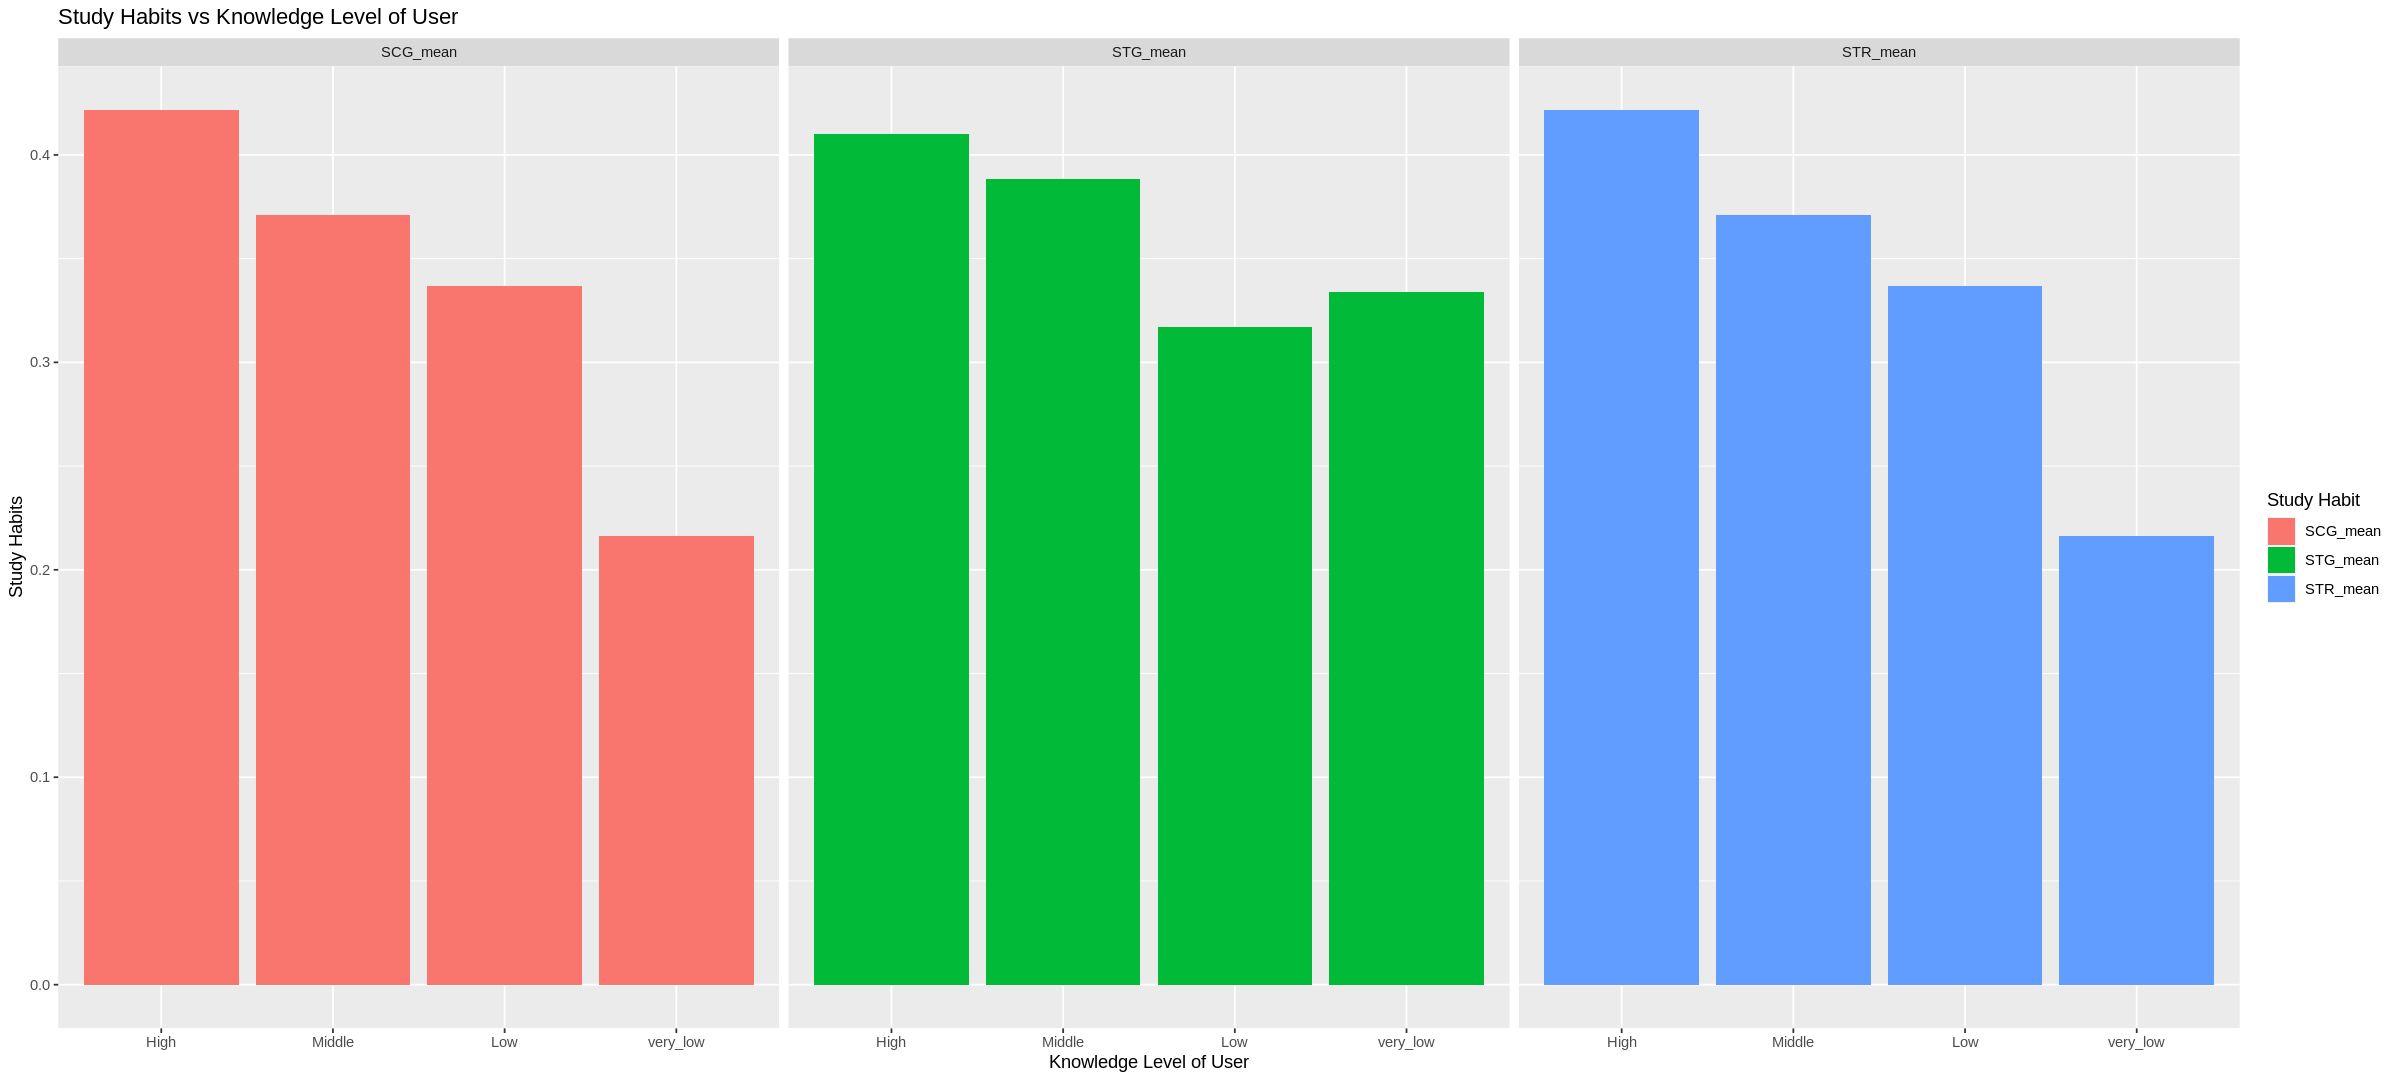

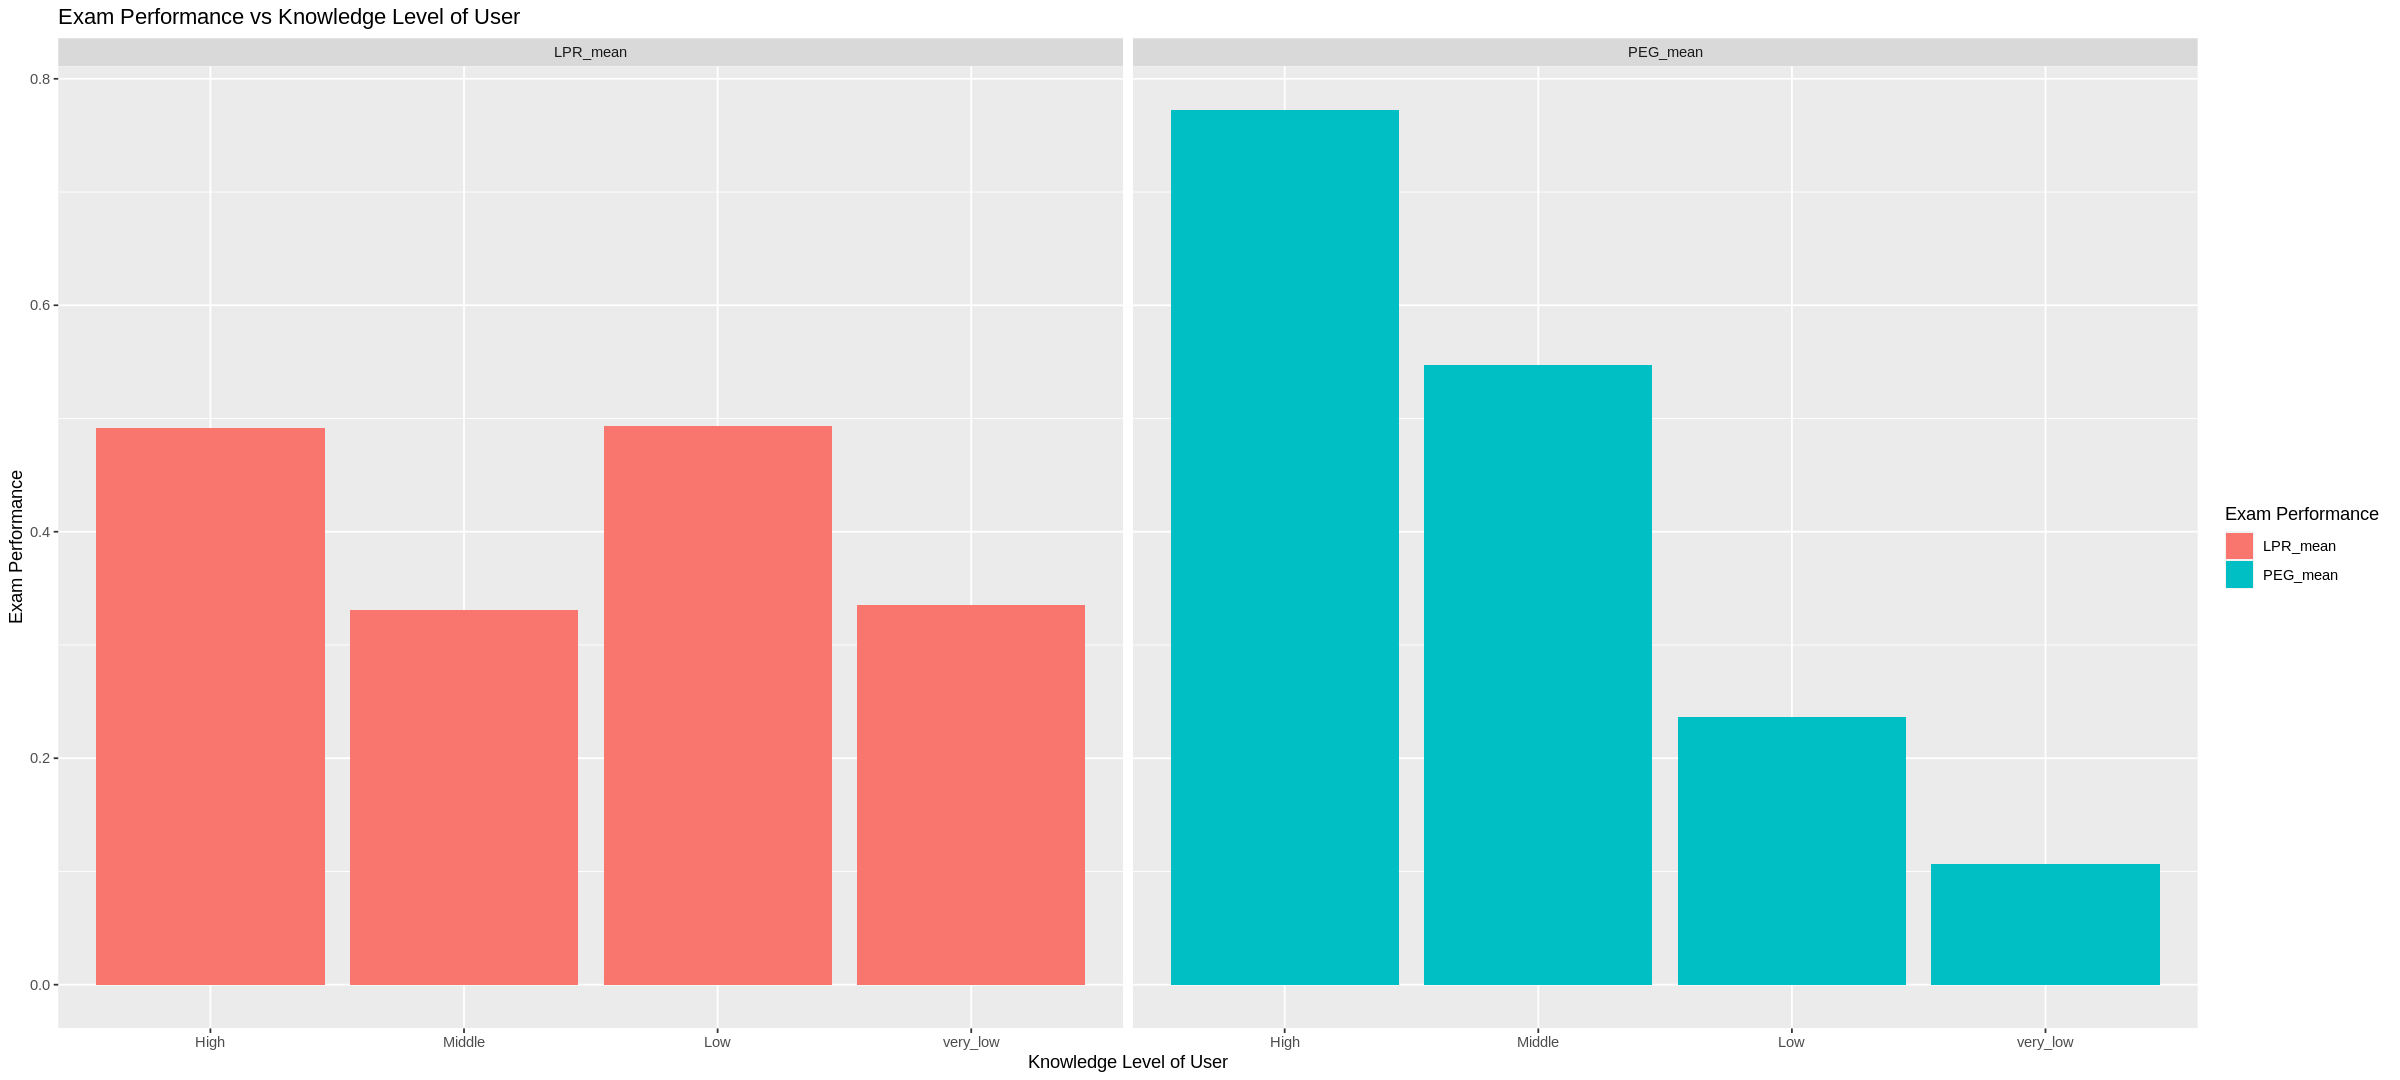

In [ ]:
# Plots
options(repr.plot.width = 20, repr.plot.height = 9)

study_habits_means_vs_knowledge_plot

exam_performance_means_vs_knowledge_plot

# Methods

We will conduct our data analysis by investigating the following columns: we will be using SCG, STG, STR, and PEG (meanings were discussed above) since these show a relationship between them and UNS, specifically that the higher average values often resulted in high level of knowledge. 

We will use the classification by the k-nearest neighbhor method, evaluating and the tuning the classifier in order to predict UNS based off of our 4 predictor columns.

We will visualize the results is by plotting each of the study habits (SCG, STG, and STR) against PEG and then colouring by UNS to help identify patterns of UNS and where they occur with respect to these predictors.

# Expected outcomes and significance

### What do you expect to find?

From the above plot and summary analysis we can loosely infer that knowledge level of the user is highly dependent on time alloted for study, repetitions of the material, study time for the particular topic, and exam performance for goal objects. We expect that user with study habits and exam performance on the main subject of study which were on the higher scale might fall on high knowledge level, while students lower values resulted in low levels of knowledge.

### What impact could such findings have?

This passage discusses the potential benefits of analyzing both study time patterns as well as exam performance to predict user knowledge level. The benefits include improved learning outcomes, customized learning experiences, better time management, effective resource allocation, and curriculum improvement. Overall, understanding how these factors relate to user knowledge level can have a positive impact on various aspects of education.

<h3>What future questions could this lead to? </h3>

- How can educators use this information to design more effective learning strategies for individual students?

- Are there other factors, such as student motivation or learning style, that also play a significant role in predicting user knowledge level?